In [1]:
import pandas as pd

df = pd.read_csv("Titanic_Train.csv")

1. What percentage of passengers survived?
The overall survival rate was low, with less than 40% of passengers surviving. This was determined by calculating the mean of the "Survived" column and visualizing survival counts with a bar chart.

Survival Rate: 38.38%


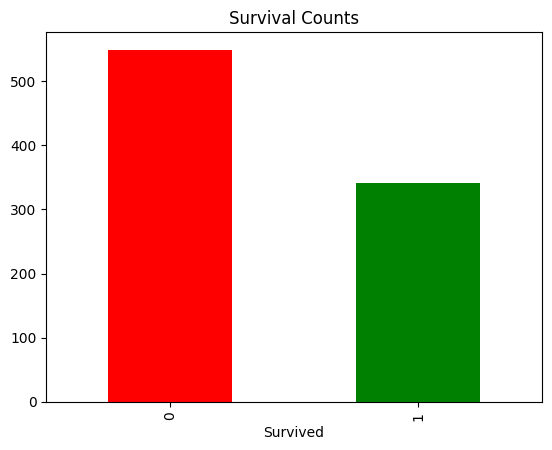

In [9]:
survival_rate = df['Survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")
df['Survived'].value_counts().plot(kind='bar', title='Survival Counts', color=['red', 'green'])
import matplotlib.pyplot as plt
plt.show()

2. Did gender influence survival chances?
Gender strongly influenced survival chances; women had a much higher survival rate than men. This was found by comparing survival proportions and plotting bar charts for each gender.

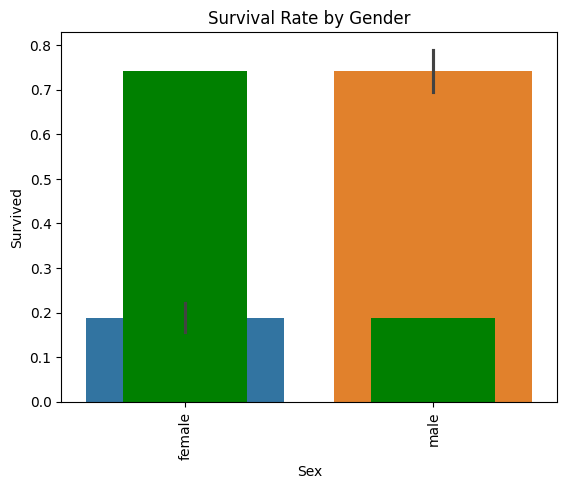

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df, hue='Sex')
df.groupby('Sex')['Survived'].mean().plot(kind='bar', title='Survival Rate by Gender', color='green')
plt.show()

3. How did passenger class (Pclass) affect survival?
Passenger class affected survival, with first-class passengers having the highest survival rates and third-class the lowest. This was shown by grouping data by class and plotting survival rates.

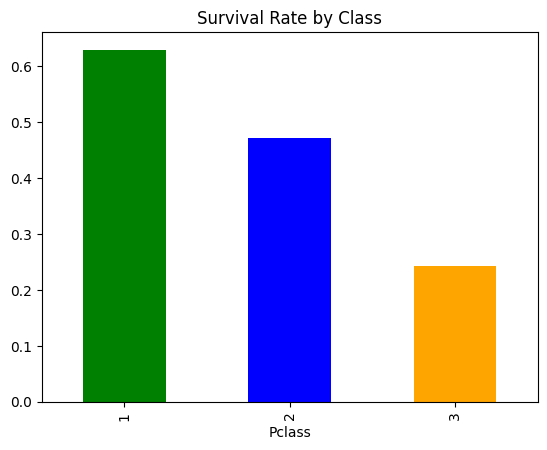

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival Rate by Class', color=['green', 'blue', 'orange'])
plt.show()

4. Was age a factor in survival?
Age was a factor in survival, as children had better chances compared to adults. This was revealed by binning ages and comparing survival proportions using histograms and KDE plots.

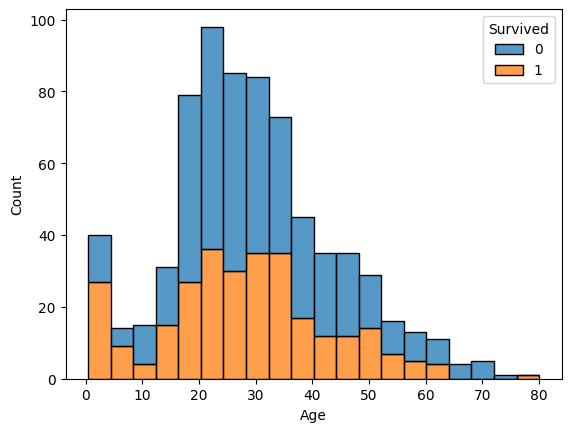

In [45]:
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
#sns.kdeplot(data=df, x='Age', hue='Survived', common_norm=False)

plt.show()

5. Which age group had the highest survival rate?
Children had the highest survival rate among all age groups. This was found by creating age bins and calculating survival rates for each group.

AgeGroup
Children    0.579710
Youth       0.428571
Adults      0.388788
Elderly     0.227273
Name: Survived, dtype: float64


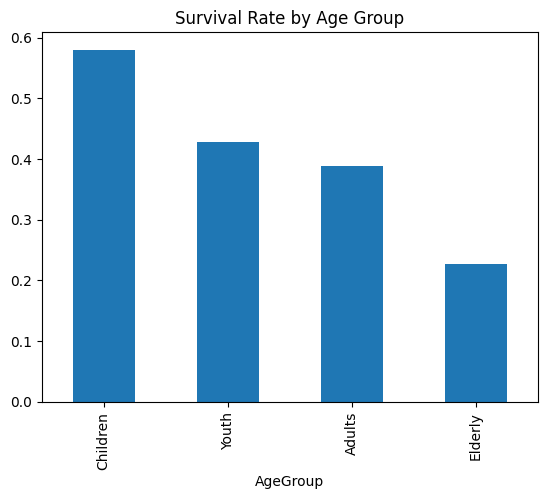

In [46]:
import matplotlib.pyplot as plt

bins = [0, 12, 18, 60, 100]
labels = ['Children', 'Youth', 'Adults', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_survival = df.groupby('AgeGroup',  observed=False)['Survived'].mean()
print(age_group_survival)

age_group_survival.plot(kind='bar', title='Survival Rate by Age Group')

plt.show()

6. Did family size (SibSp + Parch) affect survival chances?
Family size influenced survival; small families (2–4 members) survived better than large ones. This was determined by creating a "FamilySize" feature and analyzing survival rates across different sizes.

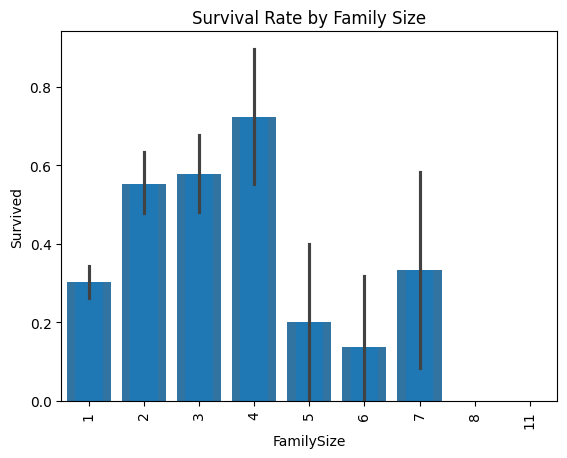

In [47]:
import matplotlib.pyplot as plt

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
import seaborn as sns
sns.barplot(x='FamilySize', y='Survived', data=df)
df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', title='Survival Rate by Family Size')

plt.show()

7. Did the embarkation port influence survival?
Embarkation port mattered, with passengers from Cherbourg (port C) showing higher survival rates. This was identified by grouping and plotting survival rates by port.

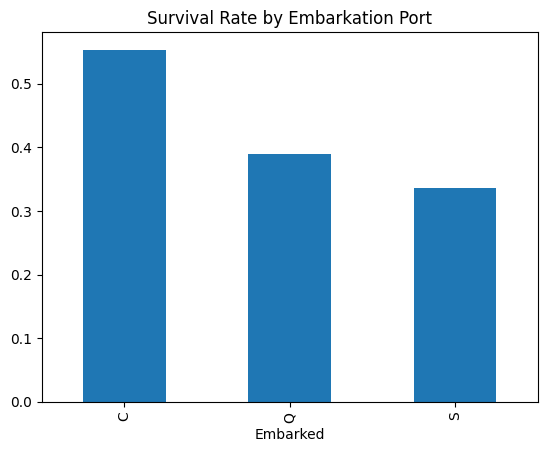

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Embarked')['Survived'].mean().plot(kind='bar', title='Survival Rate by Embarkation Port')

plt.show()

8. Did fare have any relationship with survival?
Fare was related to survival, as passengers who paid higher fares were more likely to survive. This was shown by comparing fare distributions and mean fares for survivors and non-survivors.

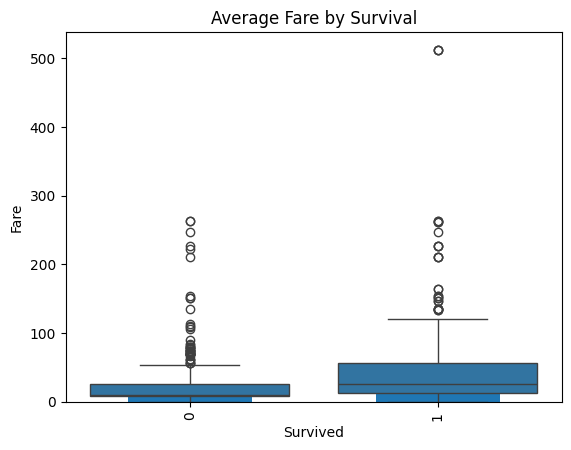

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Survived', y='Fare', data=df)
df.groupby('Survived')['Fare'].mean().plot(kind='bar', title='Average Fare by Survival')

plt.show()

9. Which combination of factors best explains survival? (Gender + Class + Age)
The combination of gender, class, and age best explained survival, with young females in first and second class having the highest rates. This was visualized using grouped bar plots.

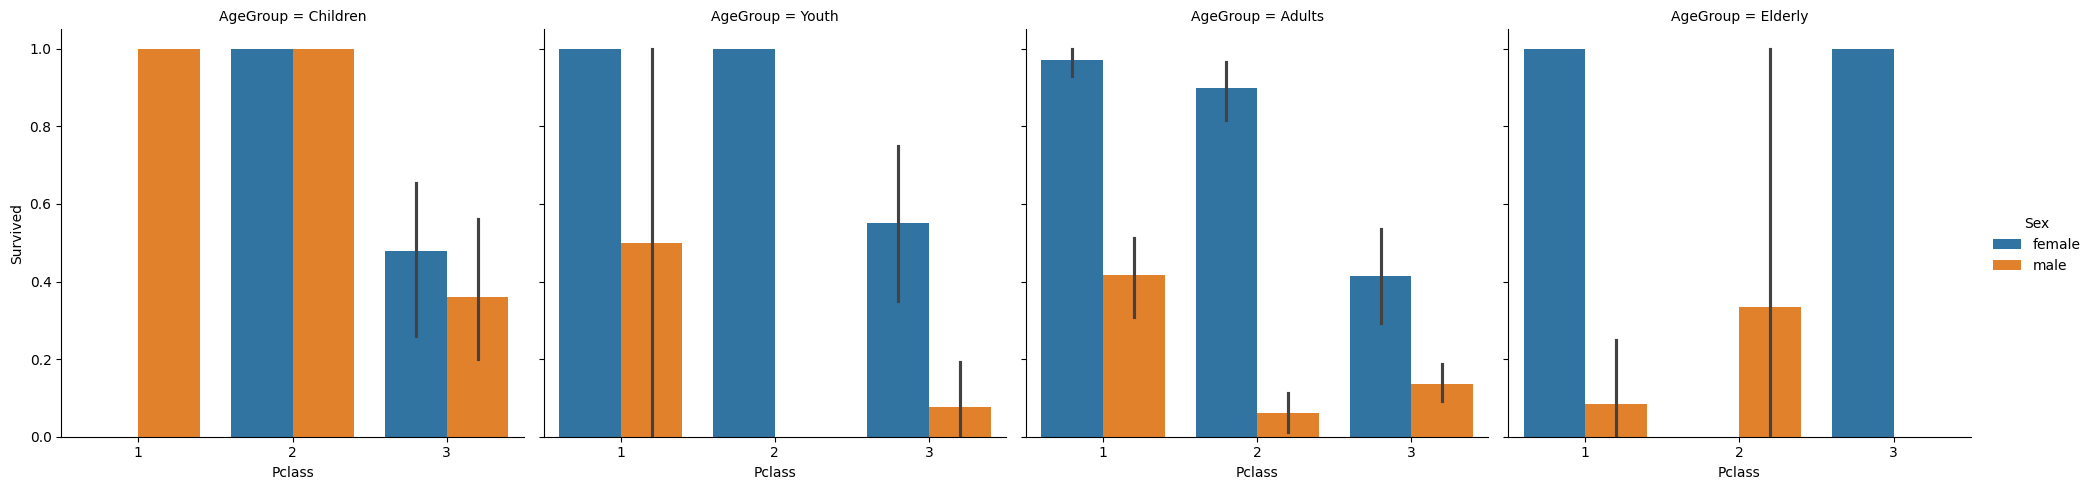

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Pclass', y='Survived', hue='Sex', col='AgeGroup', data=df, kind='bar')

plt.show()

10. Were there passengers with missing data, and how might this affect analysis?
Missing data was present in columns like Age, Embarked, and Cabin, which was identified by checking for null values and visualizing with a heatmap, highlighting the need for careful handling to avoid bias.

Age         177
Cabin       687
Embarked      2
AgeGroup    177
dtype: int64


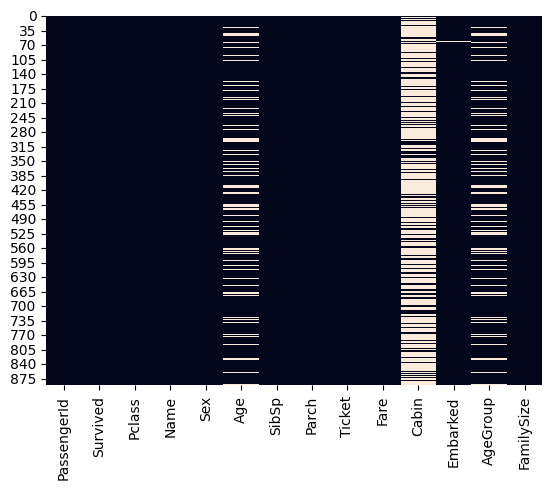

In [56]:
import matplotlib.pyplot as plt

missing = df.isnull().sum()
print(missing[missing > 0])
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

plt.show()